# Imports

In [1]:
import numpy as np
from math import *

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MAX_CARS = 20
MAX_MOVE_OF_CARS = 5
EXPECTED_FIRST_LOC_REQUESTS = 3
EXPECTED_SECOND_LOC_REQUESTS = 4
EXPECTED_FIRST_LOC_RETURNS = 3
EXPECTED_SECOND_LOC_RETURNS = 2
DISCOUNT_RATE = 0.9
RENTAL_CREDIT = 10
COST_OF_MOVING = 2
POISSON_UPPER_BOUND = 11

# Poisson distribution

In [3]:
distribution = dict()

def poisson(x, lam):
    global distribution
    key = x * 10 + lam
    if key not in distribution.keys():
        distribution[key] = np.exp(-lam) * pow(lam, x) / factorial(x)
    return distribution[key]

# Initial Policy

In [4]:
policy = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
print(policy)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

# Initial State Value

In [5]:
stateVal_2D = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
print(stateVal_2D)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

# Possible Actions

In [6]:
actions = np.arange(-MAX_MOVE_OF_CARS, MAX_MOVE_OF_CARS + 1)
actions

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

# Bellman Equation Implementation

In [7]:
def expected_Return(state, action, stateVal_2D):
    returns = 0.0
    returns -= COST_OF_MOVING * np.absolute(action)
    
    carsLoc1 = int(min(state[0] - action, MAX_CARS))
    carsLoc2 = int(min(state[1] + action, MAX_CARS))
    
    for rentalsLoc1 in range(POISSON_UPPER_BOUND):
        for rentalsLoc2 in range(POISSON_UPPER_BOUND):
            
            rentalsProb = poisson(rentalsLoc1, EXPECTED_FIRST_LOC_REQUESTS) * poisson(rentalsLoc2, EXPECTED_SECOND_LOC_REQUESTS)   
            totalRentalsLoc1 = min(carsLoc1, rentalsLoc1)
            totalRentalsLoc2 = min(carsLoc2, rentalsLoc2)
            rewards = (totalRentalsLoc1 + totalRentalsLoc2) * RENTAL_CREDIT

            for returnsLoc1 in range(POISSON_UPPER_BOUND):
                for returnsLoc2 in range(POISSON_UPPER_BOUND):
                    
                    prob = poisson(returnsLoc1, EXPECTED_FIRST_LOC_RETURNS) * poisson(returnsLoc2, EXPECTED_SECOND_LOC_RETURNS) * rentalsProb
                    carsLoc1_prime = min(carsLoc1 - totalRentalsLoc1 + returnsLoc1, MAX_CARS)
                    carsLoc2_prime = min(carsLoc2 - totalRentalsLoc2 + returnsLoc2, MAX_CARS)
                    returns += prob * (rewards + DISCOUNT_RATE * stateVal_2D[carsLoc1_prime, carsLoc2_prime])
    return returns

In [8]:
def expected_Return_Faster(state, action, stateVal_2D):
    returns = 0.0
    returns -= COST_OF_MOVING * np.absolute(action)
    
    carsLoc1 = int(min(state[0] - action, MAX_CARS))
    carsLoc2 = int(min(state[1] + action, MAX_CARS))
    
    for rentalsLoc1 in range(POISSON_UPPER_BOUND):
        for rentalsLoc2 in range(POISSON_UPPER_BOUND):
            
            rentalsProb = poisson(rentalsLoc1, EXPECTED_FIRST_LOC_REQUESTS) * poisson(rentalsLoc2, EXPECTED_SECOND_LOC_REQUESTS)   
            totalRentalsLoc1 = min(carsLoc1, rentalsLoc1)
            totalRentalsLoc2 = min(carsLoc2, rentalsLoc2)
            rewards = (totalRentalsLoc1 + totalRentalsLoc2) * RENTAL_CREDIT
            
            carsLoc1_prime = min(carsLoc1 + EXPECTED_FIRST_LOC_RETURNS, MAX_CARS)
            carsLoc2_prime = min(carsLoc2 + EXPECTED_SECOND_LOC_RETURNS, MAX_CARS)
            returns += rentalsProb * (rewards + DISCOUNT_RATE * stateVal_2D[carsLoc1_prime, carsLoc2_prime])
            
    return returns

# Agent Training

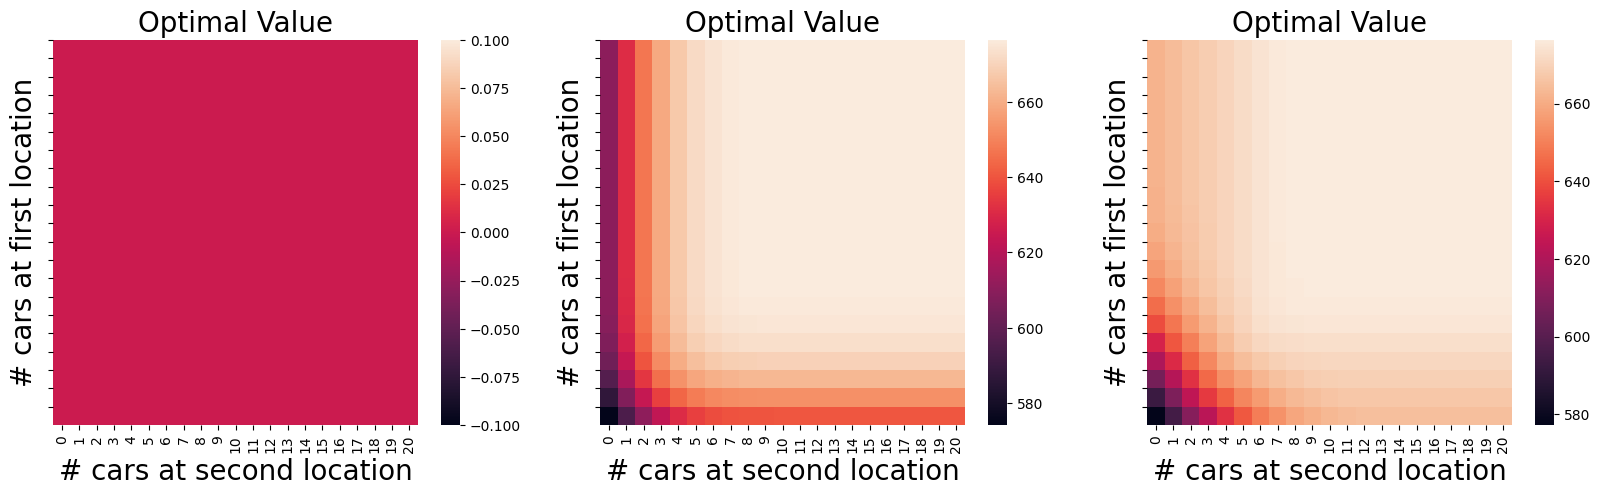

In [9]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()
iterations = 0

# Loop-out when policy reaches optimal actions
while True:
    
    fig = sns.heatmap(np.flipud(stateVal_2D), ax=axes[iterations])
    fig.set_ylabel('# cars at first location', fontsize=20)
    fig.set_yticks(list(reversed(range(MAX_CARS + 1))))
    fig.set_xlabel('# cars at second location', fontsize=20)
    fig.set_title('Optimal Value', fontsize=20)
    
    # Loop-out when maximum change in state is less than 0.0004
    while True:
        old_value = stateVal_2D.copy()
        for i in range(MAX_CARS + 1):
            for j in range(MAX_CARS + 1):
                new_state_value = expected_Return_Faster([i, j], policy[i, j], stateVal_2D)
                stateVal_2D[i, j] = new_state_value
                
        max_value_change = abs(old_value - stateVal_2D).max()
        
        if max_value_change < 1e-4:
            break
    
    
    
    policy_stable = True
    for i in range(MAX_CARS + 1):
        for j in range(MAX_CARS + 1):
            old_action = policy[i, j]
            action_returns = []
            
            for action in actions:
                if (0 <= action <= i) or (-j <= action <= 0):
                    action_returns.append(expected_Return_Faster([i, j], action, stateVal_2D))
                else:
                    action_returns.append(-np.inf) # action which are not possible(renting 4 cars while having only 2)
                    
            new_action = actions[np.argmax(action_returns)]
            policy[i, j] = new_action
            
            if policy_stable and old_action != new_action:
                policy_stable = False
    
    if policy_stable:
        break
    iterations += 1

# Optimal Policy for Different States

Text(0.5, 1.0, 'Optimal Policy')

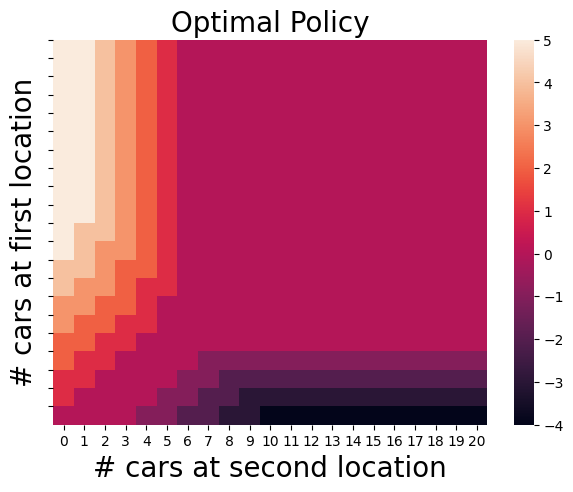

In [10]:
_, axes = plt.subplots(1, 1, figsize=(7, 5))

fig = sns.heatmap(np.flipud(policy))
fig.set_ylabel('# cars at first location', fontsize=20)
fig.set_yticks(list(reversed(range(MAX_CARS + 1))))
fig.set_xlabel('# cars at second location', fontsize=20)
fig.set_title('Optimal Policy', fontsize=20)